### Random forest 
* if we use only th edecision tree in bagging then it will we random forest 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification 


In [2]:
X,y = make_classification(n_features= 5, n_redundant= 0, n_informative= 5,n_clusters_per_class= 1)

In [3]:
df = pd.DataFrame(X,columns =['col1','col2','col3','col4','col5'])
df['target'] =y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.254272,1.843411,-0.761111,-0.521972,-0.047544,1
1,0.103387,-0.032598,-1.283193,2.697386,-2.351176,1
2,0.701577,-0.235419,-1.512330,-0.548251,-0.114563,0
3,0.747512,-0.157923,-1.519221,-0.180862,-0.113696,0
4,-0.777529,0.055069,-1.243426,2.858823,-1.149212,1


In [4]:
def sample_rows(df,percentage):
    return df.sample(int(percentage*df.shape[0]),replace = True)


In [41]:
import random
def sample_features(df,percentage):
    cols = random.sample(df.columns.tolist()[:-1],int(percentage*(df.shape[1]-1)))
    new_df =  df[cols]
    new_df['target'] = df['target']
    return new_df

In [6]:
def combined_sampling(df,row_per,col_per):
    new_df = sample_rows(df,row_per)
    return sample_features(new_df ,col_per)

In [7]:
sample_rows(df,0.1) 


,col1,col2,col3,col4,col5,target
78,1.838884,-1.814087,-0.720622,-1.509654,-2.302955,0
59,-2.783491,-1.052583,-0.089187,3.574220,-1.901688,1
46,1.690247,-2.040157,-1.424761,-1.235719,-2.094184,0
74,0.186362,3.183029,-2.771841,-0.690603,0.001745,1
89,1.171218,0.253330,-0.983572,-2.485252,-0.329006,0
30,-2.640452,1.345014,-0.397947,0.463637,1.046379,1
7,0.518337,-3.253265,-1.858245,-0.515332,-1.689604,0
47,-1.809407,1.973586,-2.317242,0.904895,-0.776523,1
1,0.103387,-0.032598,-1.283193,2.697386,-2.351176,1
98,1.104297,-0.545967,-0.020529,2.447514,-1.005364,1


In [8]:
df1 = sample_rows(df,0.1)
df2 = sample_rows(df,0.1)
df3 = sample_rows(df,0.1)


In [9]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [22]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [23]:
df1.iloc[:,0:5]

,col1,col2,col3,col4,col5
43,-1.809585,2.042745,-1.205967,-0.168629,0.342169
88,-0.136919,3.392766,-3.442548,-0.831442,-2.011042
72,1.673769,-0.593140,-2.914309,-1.091195,-0.699125
32,1.309959,-0.751259,-2.154414,-0.519116,-0.752473
87,1.565753,-1.948068,-0.216714,-0.103222,-2.377847
87,1.565753,-1.948068,-0.216714,-0.103222,-2.377847
3,0.747512,-0.157923,-1.519221,-0.180862,-0.113696
98,1.104297,-0.545967,-0.020529,2.447514,-1.005364
31,-2.277854,3.098078,-2.379576,-0.775979,0.048397
95,0.925087,-1.988166,-1.795162,-1.097555,-1.272547


In [24]:
from sklearn.tree import plot_tree 

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.57\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'x[0] <= 0.305\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= -0.352\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

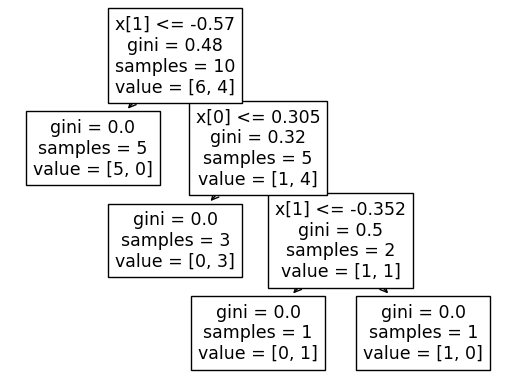

In [25]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.053\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.5, 'x[0] <= 1.319\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

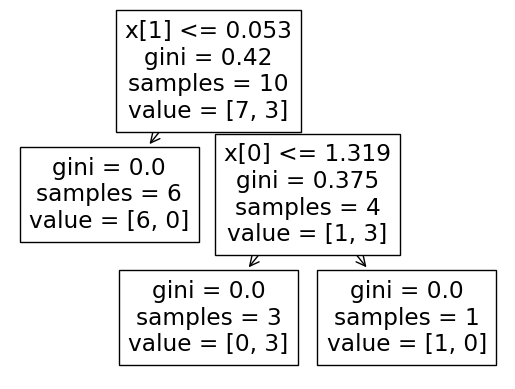

In [26]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[0] <= 0.46\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

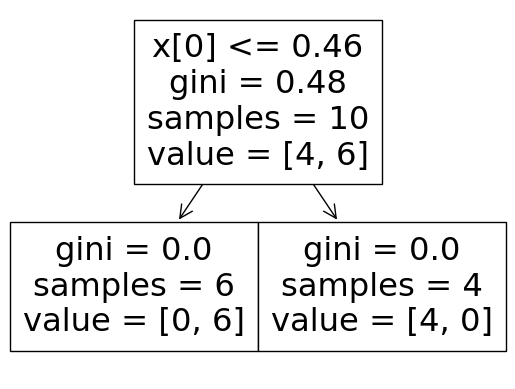

In [27]:
plot_tree(clf3)

In [28]:
clf1.predict(np.array([1.838884 ,-1.814087 ,-0.720622 ,-1.509654 ,-2.302955]).reshape(1,5))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [29]:
clf2.predict(np.array([1.838884 ,-1.814087 ,-0.720622 ,-1.509654 ,-2.302955]).reshape(1,5))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [30]:
clf3.predict(np.array([1.838884 ,-1.814087 ,-0.720622 ,-1.509654 ,-2.302955]).reshape(1,5))


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [42]:
### column sampling 
df1 = sample_features(df,0.8)
df2 = sample_features(df,0.8)
df3 = sample_features(df,0.8)


/tmp/ipykernel_4852/1463854310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_4852/1463854310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_4852/1463854310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [44]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5666666666666667, 0.9166666666666666, 'x[3] <= 0.216\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.26666666666666666, 0.75, 'x[1] <= -0.137\ngini = 0.256\nsamples = 53\nvalue = [8, 45]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[2] <= 1.042\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4, 0.5833333333333334, 'x[0] <= 0.681\ngini = 0.089\nsamples = 43\nvalue = [2, 41]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.4666666666666667, 0.4166666666666667, 'x[3] <= -2.498\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5333333333333333, 0.25, 'x[2] <= -1.84\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4666666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 1\

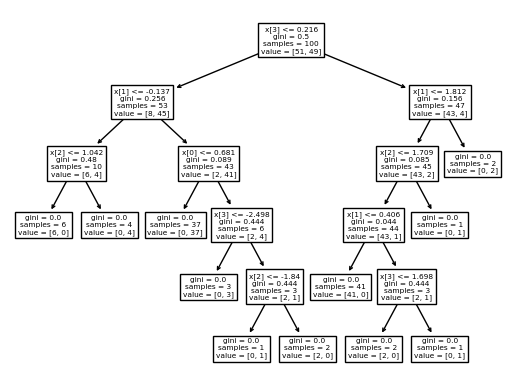

In [48]:
plot_tree(clf1)

In [50]:
df1

,col5,col2,col4,col1,target
0,-0.047544,1.843411,-0.521972,-1.254272,1
1,-2.351176,-0.032598,2.697386,0.103387,1
2,-0.114563,-0.235419,-0.548251,0.701577,0
3,-0.113696,-0.157923,-0.180862,0.747512,0
4,-1.149212,0.055069,2.858823,-0.777529,1
...,...,...,...,...,...
95,-1.272547,-1.988166,-1.097555,0.925087,0
96,-1.936251,-1.162527,-0.460558,2.239042,0
97,-0.756677,-0.128554,-2.407415,0.840196,0
98,-1.005364,-0.545967,2.447514,1.104297,1


[Text(0.5666666666666667, 0.9166666666666666, 'x[0] <= 0.216\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.26666666666666666, 0.75, 'x[2] <= -0.137\ngini = 0.256\nsamples = 53\nvalue = [8, 45]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[3] <= -0.777\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.2, 0.4166666666666667, 'x[2] <= -1.264\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4, 0.5833333333333334, 'x[1] <= 0.681\ngini = 0.089\nsamples = 43\nvalue = [2, 41]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.4666666666666667, 0.4166666666666667, 'x[0] <= -2.498\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0,

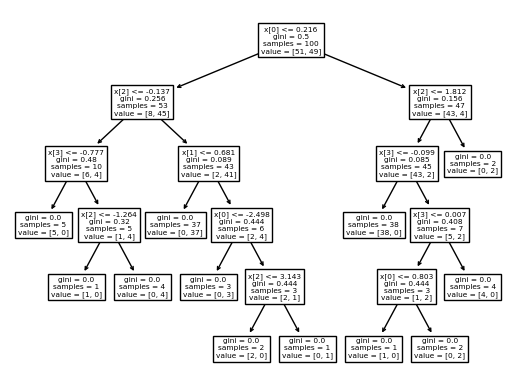

In [46]:
plot_tree(clf2)

[Text(0.375, 0.9, 'x[2] <= 0.391\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.16666666666666666, 0.7, 'x[3] <= 1.117\ngini = 0.303\nsamples = 59\nvalue = [48, 11]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.5833333333333334, 0.7, 'x[3] <= -1.571\ngini = 0.136\nsamples = 41\nvalue = [3, 38]'),
 Text(0.4166666666666667, 0.5, 'x[0] <= 0.669\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[0] <= 0.536\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.8333333333333334, 0.3, 'x[0] <= 0.973\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.9166666666666666, 0.1, 'gini = 0.0\nsamples 

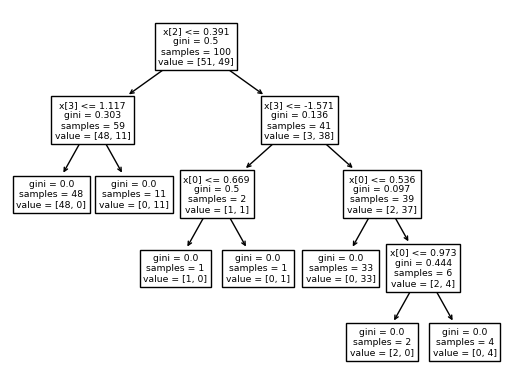

In [47]:
plot_tree(clf3)

In [51]:
clf1.predict(np.array([-2.351176 ,	-0.032598 ,	2.697386, 	0.103387]).reshape(1,4))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [53]:
clf2.predict(np.array([-2.351176 ,	-0.032598 ,	2.697386, 	0.103387]).reshape(1,4))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [55]:
clf3.predict(np.array([-2.351176 ,	-0.032598 ,	2.697386, 	0.103387]).reshape(1,4))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [71]:
# combined data (row and column )
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipykernel_4852/1463854310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_4852/1463854310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_4852/1463854310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [72]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')


In [79]:
df1

,col5,col2,target
77,-1.048176,0.238642,1
59,-1.901688,-1.052583,1
48,-0.498136,-0.454349,0
84,0.006148,1.673837,1
39,-1.869516,-2.586315,0
9,-2.359404,-0.642333,0
28,-2.912763,-2.700003,0
64,-0.872355,1.588145,1
34,-1.451862,-1.733352,0
41,-0.182858,-2.013294,0


In [75]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [77]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [80]:
clf3.predict(np.array([-1.869516 	,-2.586315]).reshape(1,2))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [81]:
clf2.predict(np.array([-1.869516 	,-2.586315]).reshape(1,2))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [82]:
clf1.predict(np.array([-1.869516 	,-2.586315]).reshape(1,2))

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### how random forest work so well 

* this algorithm give us the low bias and low vairence
* it converts the low bais and high vaience
* it reduce the impact of the outliers

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [88]:
np.random.seed(42)
X,y = make_circles(n_samples= 500 ,factor= 0.1,noise= 0.35 , random_state= 42)
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size = 0.2 ,random_state =2)

In [89]:
X.shape

(500, 2)

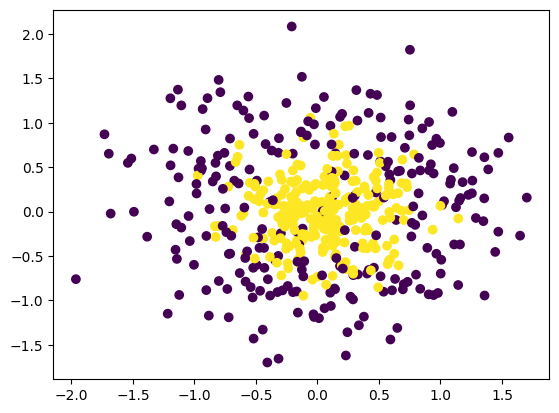

In [91]:
plt.scatter(X[:,0],X[:,1],c =y)

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state= 42)

In [93]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

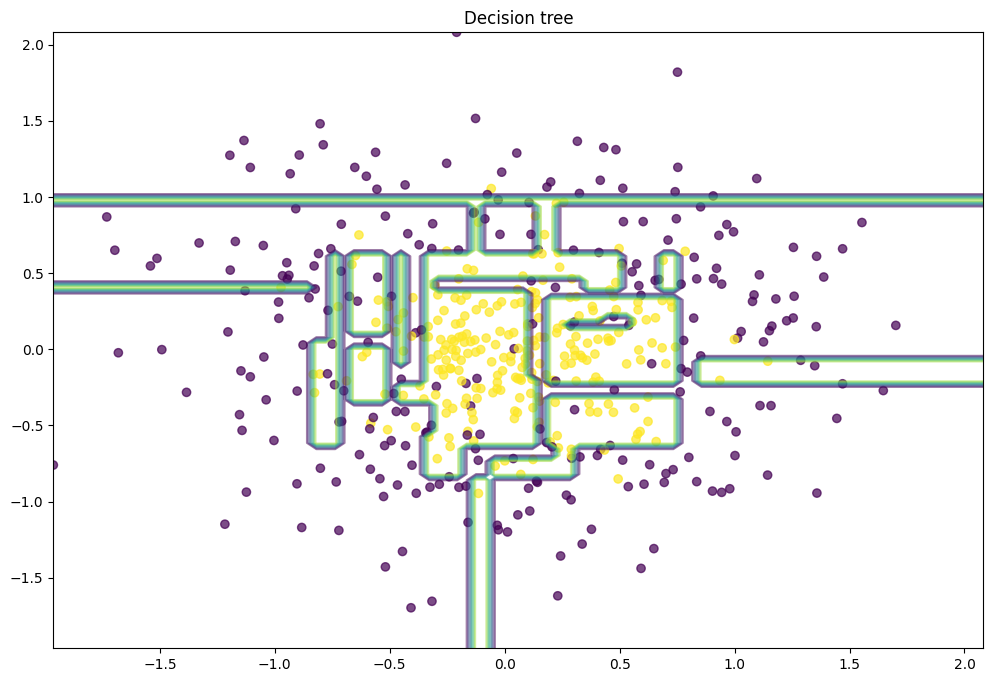

In [111]:
plt.figure(figsize=(12,8))
x_range =np.linspace(X.min(),X.max(),100)
xx1 ,xx2 = np.meshgrid(x_range,x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat =y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha =0.5)
plt.scatter(X[:,0],X[:,1],c =y,cmap ='viridis',alpha =0.7) # aplha (how dark should point)
plt.title('Decision tree')
plt.show()

In [113]:
X.min() ,X.max()

(-1.9633003701969767, 2.0822066281079223)

In [114]:
x_range =np.linspace(X.min(),X.max(),100)
xx1 ,xx2 = np.meshgrid(x_range,x_range)

In [116]:
xx1 ,xx2

(array([[-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
          2.04134292,  2.08220663],
        [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
          2.04134292,  2.08220663],
        [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
          2.04134292,  2.08220663],
        ...,
        [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
          2.04134292,  2.08220663],
        [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
          2.04134292,  2.08220663],
        [-1.96330037, -1.92243666, -1.88157296, ...,  2.00047921,
          2.04134292,  2.08220663]]),
 array([[-1.96330037, -1.96330037, -1.96330037, ..., -1.96330037,
         -1.96330037, -1.96330037],
        [-1.92243666, -1.92243666, -1.92243666, ..., -1.92243666,
         -1.92243666, -1.92243666],
        [-1.88157296, -1.88157296, -1.88157296, ..., -1.88157296,
         -1.88157296, -1.88157296],
        ...,
        [ 2.00047921,  2.00047921,  2.00047921, ...,  

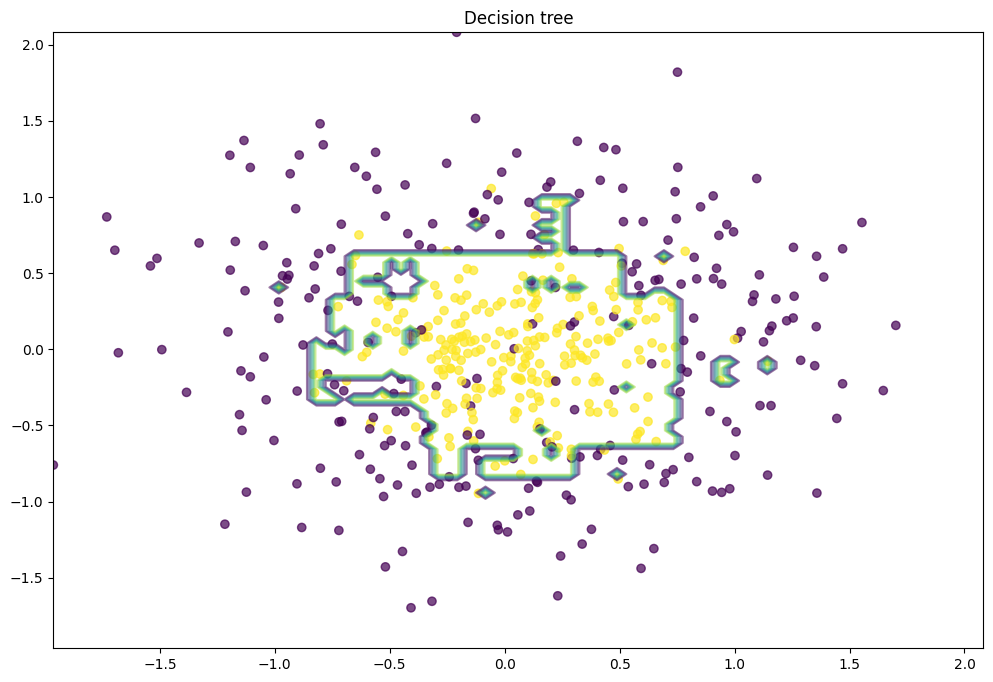

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 600,random_state=42)
rf.fit(X_train,y_train)

plt.figure(figsize=(12,8))
x_range = np.linspace(X.min() ,X.max(),100)
xx1 ,xx2 = np.meshgrid(x_range,x_range)
y_hat = rf.predict(np.c_[xx1.ravel(),xx2.ravel()]) # revel function flattent the data in 1 dimession and c_ is row wise (bydefault)
y_hat = y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha =0.5)
plt.scatter(X[:,0],X[:,1],c =y,cmap ='viridis',alpha =0.7) # aplha (how dark should point)
plt.title('Decision tree')
plt.show()

In [119]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

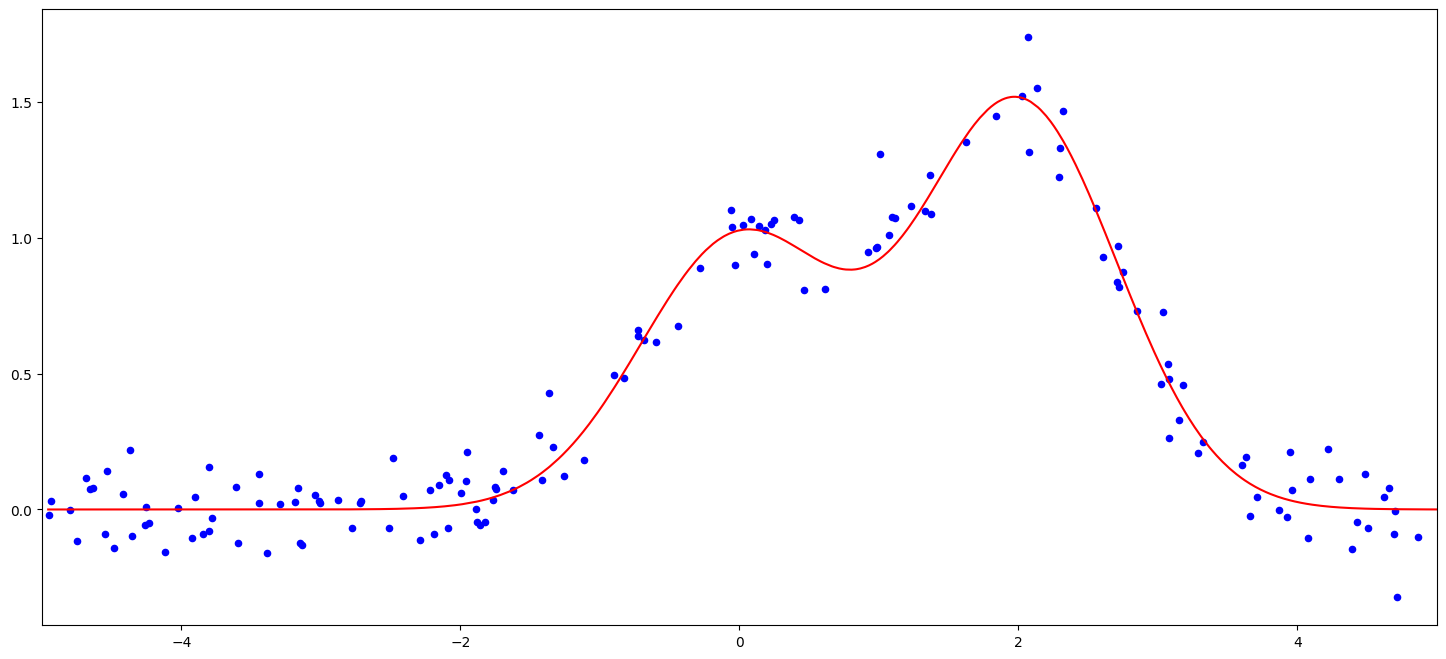

In [120]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 19.34')

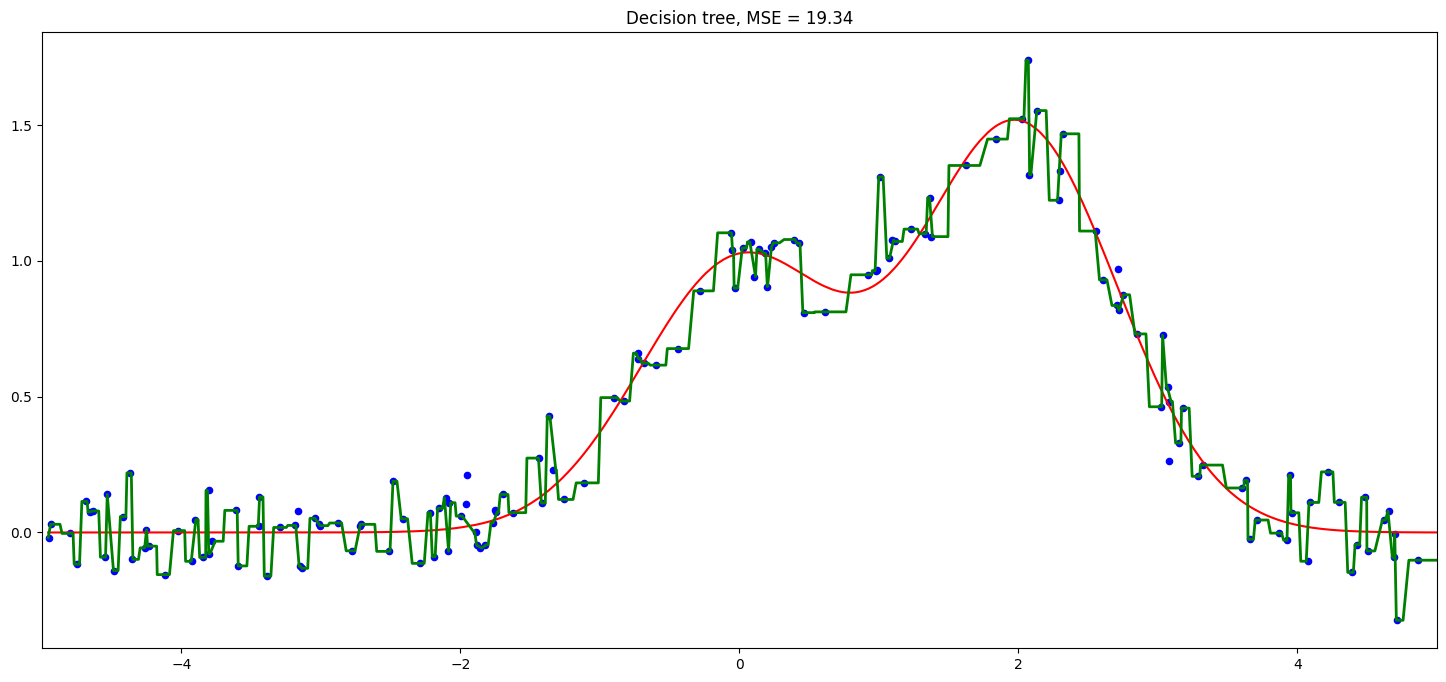

In [121]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

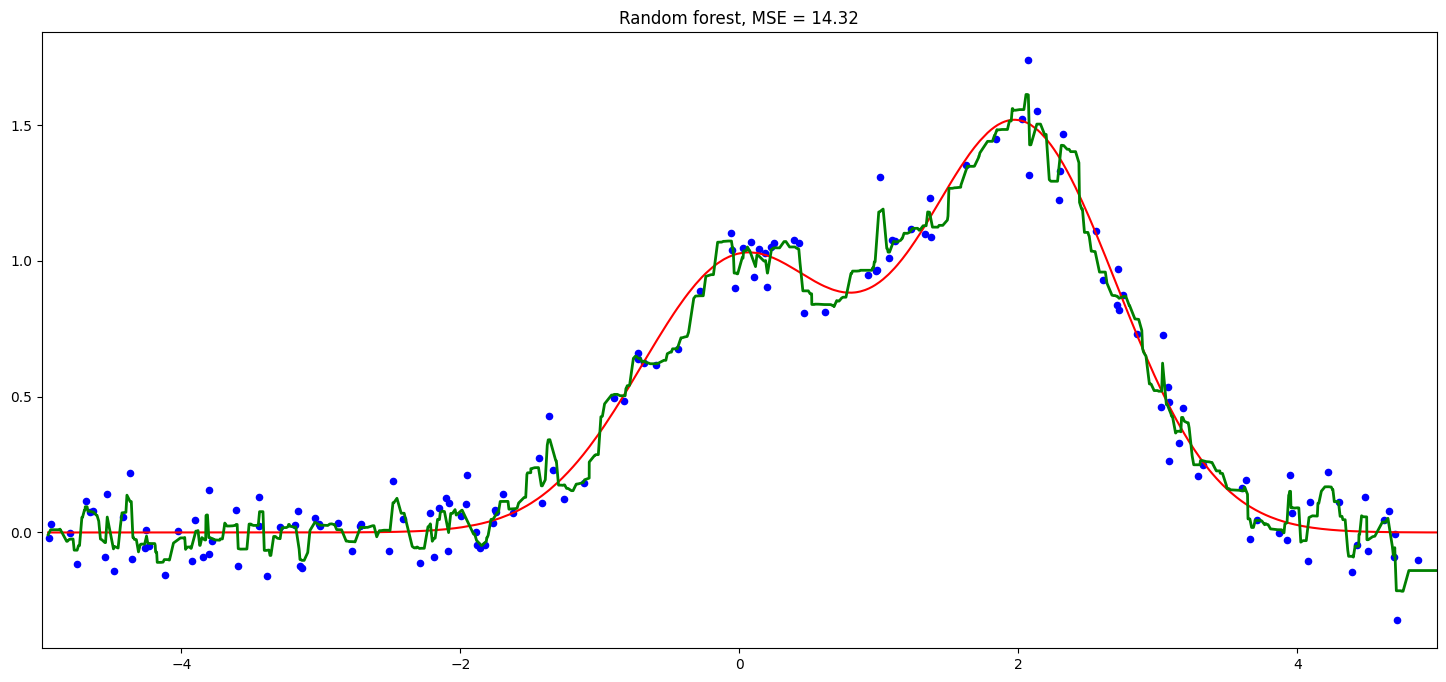

In [124]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

### hyperparameter tunning 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [126]:
df = pd.read_csv('heart.csv')

In [127]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
df.shape

(303, 14)

In [130]:
X_train ,X_test ,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size = 0.2 ,random_state = 42)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [134]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8852459016393442

In [135]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

In [140]:
rf = RandomForestClassifier()
svc = SVC()
lr = LinearRegression()
gd = GradientBoostingClassifier()

In [141]:
rf.fit(X_train,y_train)
svc.fit(X_train,y_train)
lr.fit(X_train,y_train)
gd.fit(X_train,y_train) 


GradientBoostingClassifier()

In [142]:
gd.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [143]:
lr.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [144]:
svc.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [147]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples= 0.75),df.iloc[:,0:-1],df.iloc[:,-1],cv =10 ,scoring ='accuracy'))

0.8313978494623656

### GridSearchCV 

In [149]:
n_estimator =[20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]

max_samples =[0.5,0.75,1.0]

In [159]:
param_grid ={
    'n_estimators': n_estimator,
    'max_features':max_features,
    'max_depth':max_depth,
    'max_samples':max_samples
}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [160]:
rf = RandomForestClassifier()

In [163]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(
    estimator= rf,
    param_grid= param_grid,
    cv =5,
    verbose= 2,
    n_jobs= -1
)

In [164]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [165]:
rf_grid.best_estimator_


RandomForestClassifier(max_features=0.2, max_samples=0.75, n_estimators=60)

In [166]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 60}

In [170]:
rf_grid.best_score_

0.8346938775510203

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, n_estima

### Random SEarchCV  

In [171]:
n_estimator =[20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]

max_samples =[0.5,0.75,1.0]
bootstrap =[True,False]
min_sample_split = [2,5]
min_sample_leaf =[1,2]

In [175]:
param_grid ={
    'n_estimators': n_estimator,
    'max_features':max_features,
    'max_depth':max_depth,
    'max_samples':max_samples,
    'min_samples_split': min_sample_split,
    'min_samples_leaf': min_sample_leaf
}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [176]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid =RandomizedSearchCV(
    estimator= rf,
    param_distributions= param_grid,
    cv =5,
    verbose= 2,
    n_jobs= -1
)

In [177]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [178]:
rf_grid.best_score_

0.8263605442176871

[CV] END max_depth=None, max_features=1.0, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=0.75, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.2s
[CV] END max_depth=None, max_features=0.6, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END max_depth=8, max_features=0.2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END max_depth=8, max_features=1.0, max_samples=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_sample